# TCC Arquivo fonte para experimento de Path Loss

### Importando Bibliotecas

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Path Loss

### Valor do RSSI médio por região

RSSI médio na posição 0 = -47.8 dBm
RSSI médio na posição 1 = -72.7 dBm
RSSI médio na posição 2 = -81.2 dBm
RSSI médio na posição 3 = -83.0 dBm
RSSI médio na posição 4 = -89.7 dBm
RSSI médio na posição 5 = -96.8 dBm


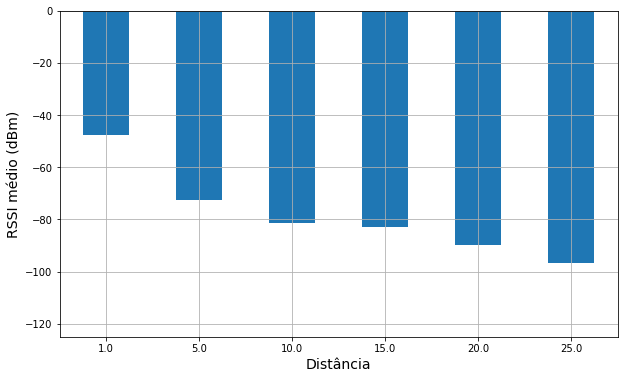

In [2]:
import math
'''
LEIA IMPORTANTE!

OBS: Colocar pele menos uma casa decimal para o python interpretar como float.
Distâncias entre transmissor e receptor, em metros.
Seguem os exemplos do roteiro:
     distances = [100.0,200.0,1000.0,3000.0]
     distances =[1.8,3.6, 5.4, 7.2, 9,10.8,12.6,14.4]
'''
distances =[1.0,5.0,10.0,15.0,20.0,25.0]

'''
LEIA IMPORTANTE!

Colocar no array os valores obtidos no smartRF para as distâncias anotadas a cima.
Seguem os exemplos do roteiro:
    rssi_measured = [0,-20,-35,-70]
    rssi_measured = [-52,-55, -57, -69, -66,-78,-69,-80]
'''
rssi_measured = [-47.8,-72.7, -81.2, -83.0,-89.7,-96.8]

for x in range(len(rssi_measured)):    
    print('RSSI médio na posição ' + str(x) + ' = ' + str(rssi_measured[x]) + ' dBm')

df = pd.DataFrame(rssi_measured, index=distances)
ax = df.plot(kind='bar', rot=0, legend=False, grid=True, ylim=(-125, 0), figsize=(10,6))
#title=u'RSSI médio por área'
ax.set_ylabel(u"RSSI médio (dBm)", fontsize=14)
ax.set_xlabel(u"Distância", fontsize=14)
plt.savefig('expPathLoss.PNG',dpi=1200)

## Modelagem Path Loss

### Cálculo do Expoente de Perda de Percurso

In [3]:
a = 0
b = 0
En = []
Pn = []
PL_d0 = rssi_measured[0]
d0 = distances[0]

En = 10*np.log10(np.divide(d0,distances))
for i in range(len(rssi_measured)):
    P = PL_d0-rssi_measured[i]
    Pn.insert(i,P)

for i in range(len(En)):
    a = a + En[i]**2
    b = b +( 2 * Pn[i] * En[i] )
alpha = abs(b)/(a*2)
print ('O coeficiente do canal é:', alpha)


O coeficiente do canal é: 3.301519276504345


### Modelagem do Path Loss usando modelo Log-distância e espaço livre

In [4]:
#Path Loss modelado.
P = PL_d0 + 10*alpha*np.log10(np.divide(d0,distances))
print(P)

[-47.8        -70.87662943 -80.81519277 -86.62887963 -90.7537561
 -93.95325886]


In [5]:
#Path Loss espaço livre. Coef. = 2.
P_fs = PL_d0 + 10*2*np.log10(np.divide(1, distances))
print(P_fs)

[-47.8        -61.77940009 -67.8        -71.32182518 -73.82059991
 -75.75880017]


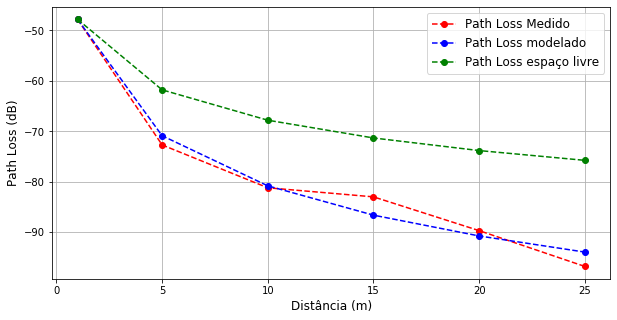

In [6]:
plt.figure(figsize=(10,5))

plt.plot(distances, rssi_measured, 'ro--', label=u'Path Loss Medido')
plt.plot(distances, P, 'bo--', label=u'Path Loss modelado')
plt.plot(distances, P_fs, 'go--', label=u'Path Loss espaço livre')

plt.legend(loc=u'upper right', fontsize=12)
plt.xlabel(u'Distância (m)', fontsize=12)
plt.ylabel(u'Path Loss (dB)', fontsize=12)
plt.grid(1)